# imports

In [1]:
import csv
import itertools
import operator
import numpy as np
import nltk
#nltk.download('punkt')
import sys
from datetime import datetime
#from keras.preprocessing.text import Tokenizer
from nltk import tokenize

import matplotlib.pyplot as plt
import re

# Load 3 Text Books and Concatenate 

In [2]:
#text files concatenation 
filenames = ['A_Journey_to_the_Center_of_the_Earth.txt', 'From_the_Earth_to_the_Moon.txt', 'The_master_of_the_world.txt']
with open('/Users/pprusty05/google_drive/Deep_Learning/assignment3/Text_file_for_training.txt', 'w+') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [3]:
train_data = open('Text_file_for_training.txt', 'r').read() 

#print(train_data)


# Preprocessing 

In [4]:
vocabulary_size = 10000
unknown_token = "UNKNOWN"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"

## Clean Text file, tokenize sentences and append sentence start and end token 

In [5]:
with open ('Text_file_for_training.txt', 'r') as f:
    
    text = f.read()
    tokenized_sent = nltk.sent_tokenize(text)
    #sentences=[x.replace('\n',' ') for x in tokenized_sent]
    sentences = [re.sub('[^a-zA-Z0-9]', ' ', x)for x in tokenized_sent]
    sentences = [word.lower() for word in sentences]

    #sentences = itertools.chain(*[tokenize.sent_tokenize(x) for x in f])
    sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]
    
print( "Parsed %d sentences." % (len(sentences)))

    


Parsed 13926 sentences.


# Tokenize Word

In [6]:
# Tokenize the sentences into words
tokenized_words = [nltk.word_tokenize(sent) for sent in sentences]

# Calculate word frequency and build index_to_word and word_to_index vectors

In [7]:
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_words))
print("Found %d unique words tokens." % len(word_freq.items()))

Found 13079 unique words tokens.


In [8]:
word_freq

FreqDist({'the': 17484, 'SENTENCE_START': 13926, 'SENTENCE_END': 13926, 'of': 9369, 'to': 6171, 'and': 5424, 'a': 4466, 'in': 3619, 'i': 3275, 'was': 2858, ...})

In [9]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])

In [10]:
print("Using vocabulary size %d." % vocabulary_size)
print("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))
word_freq.most_common(10)

Using vocabulary size 10000.
The least frequent word in our vocabulary is 'volturne' and appeared 1 times.


[('the', 17484),
 ('SENTENCE_START', 13926),
 ('SENTENCE_END', 13926),
 ('of', 9369),
 ('to', 6171),
 ('and', 5424),
 ('a', 4466),
 ('in', 3619),
 ('i', 3275),
 ('was', 2858)]

In [11]:
len(word_to_index)

10000

In [12]:
tokenized_words

[['SENTENCE_START',
  'project',
  'gutenberg',
  's',
  'a',
  'journey',
  'to',
  'the',
  'centre',
  'of',
  'the',
  'earth',
  'by',
  'jules',
  'verne',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  'SENTENCE_END'],
 ['SENTENCE_START',
  'you',
  'may',
  'copy',
  'it',
  'give',
  'it',
  'away',
  'or',
  're',
  'use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included',
  'with',
  'this',
  'ebook',
  'or',
  'online',
  'at',
  'www',
  'gutenberg',
  'org',
  'title',
  'a',
  'journey',
  'to',
  'the',
  'centre',
  'of',
  'the',
  'earth',
  'author',
  'jules',
  'verne',
  'release',
  'date',
  'july',
  '18',
  '2006',
  'ebook',
  '18857',
  'last',
  'updated',
  'december',
  '27',
  '2012',
  'language',
  'english',
  'character',
  'set',
  'encoding',
  '

In [13]:
# Replace all words not in our vocabulary with the unknown token
for i, sent in enumerate(tokenized_words):
    tokenized_words[i] = [w if w in word_to_index else unknown_token for w in sent]

In [14]:
print("\nExample sentence: '%s'" % sentences[0])
print("\nExample sentence after Pre-processing: '%s'" % tokenized_words[0])


Example sentence: 'SENTENCE_START project gutenberg s a journey to the centre of the earth  by jules verne  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever  SENTENCE_END'

Example sentence after Pre-processing: '['SENTENCE_START', 'project', 'gutenberg', 's', 'a', 'journey', 'to', 'the', 'centre', 'of', 'the', 'earth', 'by', 'jules', 'verne', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'SENTENCE_END']'


# XTrain and yTrain 

In [15]:
# Create the training data
XTrain = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_words])
yTrain = np.asarray([[word_to_index[w] for w in sent[1:]] for sent in tokenized_words])

In [16]:
XTrain.shape

(13926,)

In [17]:
yTrain.shape

(13926,)

In [18]:
# Print an training data example
x_example, y_example = XTrain[17], yTrain[17]
print ("x:\n%s\n%s" % (" ".join([index_to_word[x] for x in x_example]), x_example))
print ("\ny:\n%s\n%s" % (" ".join([index_to_word[x] for x in y_example]), y_example))

x:
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]

y:
to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him SENTENCE_END
[4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76, 2]


# Word level vanilla RNN

In [19]:
class RNNVanilla:
     
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=10):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        
        
    def softmax(self,x):
        xt = np.exp(x - np.max(x))
        return xt / np.sum(xt)
    
    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)

        # During forward propagation we save all hidden states in s because need them later.

        # We add one additional element for the initial hidden, which we set to 0
        s = np.zeros((T + 1, self.hidden_dim))
        s[-1] = np.zeros(self.hidden_dim)

        # The outputs at each time step. Again, we save them for later.
        o = np.zeros((T, self.word_dim))

        # For each time step...
        for t in np.arange(T):
            # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
            s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
            o[t] = self.softmax(self.V.dot(s[t]))
        return [o, s] 

    def predict(self, x):
        # Perform forward propagation and return index of the highest score
        o, s = self.forward_propagation(x)
        return np.argmax(o, axis=1)

    def calculate_total_loss(self, x, y):
        L = 0

        # For each sentence...
        for i in np.arange(len(y)):
            o, s = self.forward_propagation(x[i])

            # We only care about our prediction of the "correct" words
            correct_word_predictions = o[np.arange(len(y[i])), y[i]]

            # Add to the loss based on how off we were
            L += -1 * sum(np.log(correct_word_predictions))
        return L
 
    def calculate_loss(self, x, y):
        # Divide the total loss by the number of training examples
        N = sum((len(y_i) for y_i in y))
        return self.calculate_total_loss(x,y)/N
    def bptt(self, x, y):
        T = len(y)
        # Perform forward propagation
        o, s = self.forward_propagation(x)
        # We accumulate the gradients in these variables
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        delta_o = o
        delta_o[np.arange(len(y)), y] -= 1.
        # For each output backwards...
        for t in np.arange(T)[::-1]:
            dLdV += np.outer(delta_o[t], s[t].T)

            # Initial delta calculation
            delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

            # Backpropagation through time (for at most self.bptt_truncate steps)
            for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

                # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
                dLdW += np.outer(delta_t, s[bptt_step-1])              
                dLdU[:,x[bptt_step]] += delta_t

                # Update delta for next step
                delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
        return [dLdU, dLdV, dLdW]
    
    def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
        # Calculate the gradients using backpropagation. We want to checker if these are correct.
        bptt_gradients = self.bptt(x, y)

        # List of all parameters we want to check.
        model_parameters = ['U', 'V', 'W']

        # Gradient check for each parameter
        for pidx, pname in enumerate(model_parameters):
            # Get the actual parameter value from the mode, e.g. model.W
            parameter = operator.attrgetter(pname)(self)
            print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
            # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
            it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
            while not it.finished:
                ix = it.multi_index
                # Save the original value so we can reset it later
                original_value = parameter[ix]
                # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
                parameter[ix] = original_value + h
                gradplus = self.calculate_total_loss([x],[y])
                parameter[ix] = original_value - h
                gradminus = self.calculate_total_loss([x],[y])
                estimated_gradient = (gradplus - gradminus)/(2*h)
                # Reset parameter to original value
                parameter[ix] = original_value
                # The gradient for this parameter calculated using backpropagation
                backprop_gradient = bptt_gradients[pidx][ix]
                # calculate The relative error: (|x - y|/(|x| + |y|))
                relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
                # If the error is to large fail the gradient check
                if relative_error > error_threshold:
                    print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                    print ("+h Loss: %f" % gradplus)
                    print ("-h Loss: %f" % gradminus)
                    print ("Estimated_gradient: %f" % estimated_gradient)
                    print ("Backpropagation gradient: %f" % backprop_gradient)
                    print ("Relative Error: %f" % relative_error)
                    return
                it.iternext()
            print ("Gradient check for parameter %s passed." % (pname))
            
            # Performs one step of SGD.
    def numpy_sdg_step(self, x, y, learning_rate):
        # Calculate the gradients
        dLdU, dLdV, dLdW = self.bptt(x, y)
        # Change parameters according to gradients and learning rate
        self.U -= learning_rate * dLdU
        self.V -= learning_rate * dLdV
        self.W -= learning_rate * dLdW
        
        
    def generate_sentence(self,model,eval_list):
        flat_list = [item for sublist in eval_list for item in sublist]
    # We start the sentence with the start token
        new_sentence = [flat_list[0]]

        # Repeat until we get an end token
        while not new_sentence[-1] == word_to_index[sentence_end_token]:
            next_word_probs,_ = model.forward_propagation(new_sentence)
            sampled_word = word_to_index[unknown_token]
            # We don't want to sample unknown words
            while sampled_word == word_to_index[unknown_token]:
                samples = np.random.multinomial(1, next_word_probs[-1])
                sampled_word = np.argmax(samples)
            new_sentence.append(sampled_word)
        sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
        return sentence_str


    def train_with_sgd(self, X_train, y_train, break_points_list,eval_list, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
        # We keep track of the losses so we can plot them later
        losses = []
        loss_per_epoch=[]
        num_examples_seen = 0
        for epoch in range(nepoch):
            # Optionally evaluate the loss
            if (epoch % evaluate_loss_after == 0):
                loss = model.calculate_loss(X_train, y_train)
                losses.append((num_examples_seen, loss))
                loss_per_epoch.append(loss)
                time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
                # Adjust the learning rate if loss increases
                if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                    learning_rate = learning_rate * 0.5 
                    print ("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
               
            if epoch in break_points_list:
                print(' '*50)
                print(' '*50)
                print(' '*50)
                print(' '*50)
                print("="*50)
                print("--- Start Pred -- ")
                for eval_word in eval_list:
                    
                    print("Chunk of Input Words of a sentence-- ")
                    print('%s'%" ".join([index_to_word[x] for x in eval_word]))
                    
                    print("-"*50)
                    
                    prediction = model.predict(eval_word)
                    #print(predictions.shape)#print("index_to_word>")
                    print("Output Words of the sentence at epoch--",epoch)
                    print('%s'%" ".join([index_to_word[x] for x in prediction]))
                    print(' '*50)
                
                num_sentences = 1
                senten_min_length = 7

                for i in range(num_sentences):
                    sent = []
                    # We want long sentences, not sentences with one or two words
                    while len(sent) < senten_min_length:
                        sent = self.generate_sentence(model,eval_list)
                    print("Generate Words by feeding the first word to the model at epoch--",epoch)
                    print (" ".join(sent))
                
                print('='*50)
                print(' '*50)
                print(' '*50)
                print(' '*50)
                print(' '*50)

            # For each training example...
            for i in range(len(y_train)):
                # One SGD step
                model.numpy_sdg_step(X_train[i], y_train[i], learning_rate)
                num_examples_seen += 1
            #Plot the Loss Curves
        print(loss_per_epoch)
        plt.figure(figsize=[8,6])
        plt.plot(loss_per_epoch,'r',linewidth=3.0)
        plt.legend(['Training loss'],fontsize=18)
        plt.xlabel('Epochs ',fontsize=16)
        plt.ylabel('Loss',fontsize=16)
        plt.title('Loss Curves',fontsize=16)



# Words prediction after forward propagation

In [20]:
np.random.seed(10)
model = RNNVanilla(vocabulary_size)
o, s = model.forward_propagation(XTrain[17])
print(o.shape)
#print(o)
print("========================")
#The following gives the indices of the highest probability predictions for each word:
predictions = model.predict(XTrain[17])
print(XTrain[17])
print("input_words>")
print('%s'%" ".join([index_to_word[x] for x in XTrain[17]]))
print("========================")
print(predictions)
print("output_words>")
print('%s'%" ".join([index_to_word[x] for x in predictions]))

(28, 10000)
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
input_words>
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him
[4294 6250 4465 1076  689 2659 7105 4429 8140 2081 6139 2612 7425 6812
 6807 7029 2299 2341 9056 9426 8912 5180 6888 1911 7296 8950 8510 8434]
output_words>
breast newest aloft field information sad enlarged mercury hardest citizens father reported rapids previsions nautical figured intelligence nowhere observable choke percolation enjoyed posts loose skill elaborate heather moves


# Report gradient check routine

In [21]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model = RNNVanilla(grad_check_vocab_size, 10, bptt_truncate=1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


/Users/pprusty05/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


# Report the training loss vs epochs as a plot, output of the network at breakpoints.

2019-11-06 23:35:38: Loss after num_examples_seen=0 epoch=0: 9.210280
2019-11-06 23:36:59: Loss after num_examples_seen=500 epoch=1: 6.852495
                                                  
                                                  
                                                  
                                                  
--- Start Pred -- 
Chunk of Input Words of a sentence-- 
SENTENCE_START chapter 19 the western gallery a new route chapter 20 water where is it
--------------------------------------------------
Output Words of the sentence at epoch-- 1
i SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END
                                                  
Generate Words by feeding the first word to the model at epoch-- 1
parsonstown determined circles a at leipzig an me alabama gossips lasted the a preoccupation inherent had publicati

2019-11-06 23:59:55: Loss after num_examples_seen=20500 epoch=41: 5.585305
2019-11-07 00:00:27: Loss after num_examples_seen=21000 epoch=42: 5.584689
2019-11-07 00:00:59: Loss after num_examples_seen=21500 epoch=43: 5.585236
Setting learning rate to 0.000020
2019-11-07 00:01:30: Loss after num_examples_seen=22000 epoch=44: 5.579417
2019-11-07 00:02:02: Loss after num_examples_seen=22500 epoch=45: 5.576532
2019-11-07 00:02:33: Loss after num_examples_seen=23000 epoch=46: 5.577269
Setting learning rate to 0.000010
2019-11-07 00:03:05: Loss after num_examples_seen=23500 epoch=47: 5.572858
2019-11-07 00:03:36: Loss after num_examples_seen=24000 epoch=48: 5.573408
Setting learning rate to 0.000005
2019-11-07 00:04:08: Loss after num_examples_seen=24500 epoch=49: 5.567840
2019-11-07 00:04:39: Loss after num_examples_seen=25000 epoch=50: 5.565659
                                                  
                                                  
                                              

2019-11-07 00:24:38: Loss after num_examples_seen=44000 epoch=88: 5.522655
2019-11-07 00:25:09: Loss after num_examples_seen=44500 epoch=89: 5.522013
2019-11-07 00:25:41: Loss after num_examples_seen=45000 epoch=90: 5.521417
                                                  
                                                  
                                                  
                                                  
--- Start Pred -- 
Chunk of Input Words of a sentence-- 
SENTENCE_START chapter 19 the western gallery a new route chapter 20 water where is it
--------------------------------------------------
Output Words of the sentence at epoch-- 90
i was the uncle of SENTENCE_END the SENTENCE_END SENTENCE_END SENTENCE_END the SENTENCE_END SENTENCE_END the SENTENCE_END
                                                  
Generate Words by feeding the first word to the model at epoch-- 90
now wonderful we him know surmise the on in wild invention the it to taken favorite
        

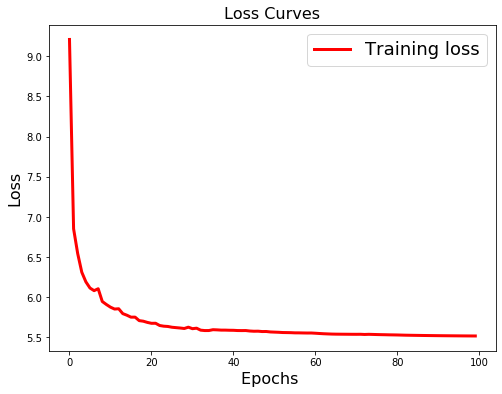

In [22]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNVanilla(vocabulary_size)
losses = model.train_with_sgd( XTrain[:500], yTrain[:500],  break_points_list=[1,10,20,30,40,50,60,70,80,90],
                        eval_list =[XTrain[7]],learning_rate=0.01,nepoch=100, evaluate_loss_after=1)

# Number of hidden units: Try doubling and halving your number of hidden units. And after training, plot the training loss vs the number of training epochs, and show the text sampling

## doubling the hidden units

In [23]:
class RNNVanilla_1:
     
    def __init__(self, word_dim, hidden_dim=200, bptt_truncate=10):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        
        
    def softmax(self,x):
        xt = np.exp(x - np.max(x))
        return xt / np.sum(xt)
    
    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)

        # During forward propagation we save all hidden states in s because need them later.

        # We add one additional element for the initial hidden, which we set to 0
        s = np.zeros((T + 1, self.hidden_dim))
        s[-1] = np.zeros(self.hidden_dim)

        # The outputs at each time step. Again, we save them for later.
        o = np.zeros((T, self.word_dim))

        # For each time step...
        for t in np.arange(T):
            # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
            s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
            o[t] = self.softmax(self.V.dot(s[t]))
        return [o, s] 

    def predict(self, x):
        # Perform forward propagation and return index of the highest score
        o, s = self.forward_propagation(x)
        return np.argmax(o, axis=1)

    def calculate_total_loss(self, x, y):
        L = 0

        # For each sentence...
        for i in np.arange(len(y)):
            o, s = self.forward_propagation(x[i])

            # We only care about our prediction of the "correct" words
            correct_word_predictions = o[np.arange(len(y[i])), y[i]]

            # Add to the loss based on how off we were
            L += -1 * sum(np.log(correct_word_predictions))
        return L
 
    def calculate_loss(self, x, y):
        # Divide the total loss by the number of training examples
        N = sum((len(y_i) for y_i in y))
        return self.calculate_total_loss(x,y)/N
    def bptt(self, x, y):
        T = len(y)
        # Perform forward propagation
        o, s = self.forward_propagation(x)
        # We accumulate the gradients in these variables
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        delta_o = o
        delta_o[np.arange(len(y)), y] -= 1.
        # For each output backwards...
        for t in np.arange(T)[::-1]:
            dLdV += np.outer(delta_o[t], s[t].T)

            # Initial delta calculation
            delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

            # Backpropagation through time (for at most self.bptt_truncate steps)
            for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

                # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
                dLdW += np.outer(delta_t, s[bptt_step-1])              
                dLdU[:,x[bptt_step]] += delta_t

                # Update delta for next step
                delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
        return [dLdU, dLdV, dLdW]
    
    def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
        # Calculate the gradients using backpropagation. We want to checker if these are correct.
        bptt_gradients = self.bptt(x, y)

        # List of all parameters we want to check.
        model_parameters = ['U', 'V', 'W']

        # Gradient check for each parameter
        for pidx, pname in enumerate(model_parameters):
            # Get the actual parameter value from the mode, e.g. model.W
            parameter = operator.attrgetter(pname)(self)
            print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
            # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
            it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
            while not it.finished:
                ix = it.multi_index
                # Save the original value so we can reset it later
                original_value = parameter[ix]
                # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
                parameter[ix] = original_value + h
                gradplus = self.calculate_total_loss([x],[y])
                parameter[ix] = original_value - h
                gradminus = self.calculate_total_loss([x],[y])
                estimated_gradient = (gradplus - gradminus)/(2*h)
                # Reset parameter to original value
                parameter[ix] = original_value
                # The gradient for this parameter calculated using backpropagation
                backprop_gradient = bptt_gradients[pidx][ix]
                # calculate The relative error: (|x - y|/(|x| + |y|))
                relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
                # If the error is to large fail the gradient check
                if relative_error > error_threshold:
                    print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                    print ("+h Loss: %f" % gradplus)
                    print ("-h Loss: %f" % gradminus)
                    print ("Estimated_gradient: %f" % estimated_gradient)
                    print ("Backpropagation gradient: %f" % backprop_gradient)
                    print ("Relative Error: %f" % relative_error)
                    return
                it.iternext()
            print ("Gradient check for parameter %s passed." % (pname))
            
            # Performs one step of SGD.
    def numpy_sdg_step(self, x, y, learning_rate):
        # Calculate the gradients
        dLdU, dLdV, dLdW = self.bptt(x, y)
        # Change parameters according to gradients and learning rate
        self.U -= learning_rate * dLdU
        self.V -= learning_rate * dLdV
        self.W -= learning_rate * dLdW
        
    def generate_sentence(self,model1,eval_list):
        flat_list = [item for sublist in eval_list for item in sublist]
    # We start the sentence with the start token
        new_sentence = [flat_list[0]]

        # Repeat until we get an end token
        while not new_sentence[-1] == word_to_index[sentence_end_token]:
            next_word_probs,_ = model1.forward_propagation(new_sentence)
            sampled_word = word_to_index[unknown_token]
            # We don't want to sample unknown words
            while sampled_word == word_to_index[unknown_token]:
                samples = np.random.multinomial(1, next_word_probs[-1])
                sampled_word = np.argmax(samples)
            new_sentence.append(sampled_word)
        sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
        return sentence_str


    def train_with_sgd(self, X_train, y_train, break_points_list,eval_list, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
        # We keep track of the losses so we can plot them later
        losses = []
        loss_per_epoch=[]
        num_examples_seen = 0
        for epoch in range(nepoch):
            # Optionally evaluate the loss
            if (epoch % evaluate_loss_after == 0):
                loss = model1.calculate_loss(X_train, y_train)
                losses.append((num_examples_seen, loss))
                loss_per_epoch.append(loss)
                time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
                # Adjust the learning rate if loss increases
                if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                    learning_rate = learning_rate * 0.5 
                    print ("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
            if epoch in break_points_list:
                print("========================")
                print("Start Pred -- ")
                for eval_word in eval_list:
                    
                    print("Chunk of Input Words of a sentence-- ")
                    print(eval_word)
                    print('%s'%" ".join([index_to_word[x] for x in eval_word]))
                    
                    print("========================")
                    
                    prediction = model1.predict(eval_word)
                    #print(predictions.shape)#print("index_to_word>")
                    print("Output Words of the sentence at epoch--",epoch)
                    print(prediction)
                    print('%s'%" ".join([index_to_word[x] for x in prediction]))
                    
                    print("========================")
                
                num_sentences = 1
                senten_min_length = 7

                for i in range(num_sentences):
                    sent = []
                    # We want long sentences, not sentences with one or two words
                    while len(sent) < senten_min_length:
                        sent = self.generate_sentence(model1,eval_list)
                    print("Generate Words by feeding the first word to the model at epoch--",epoch)
                    print (" ".join(sent))
                
                print("========================")

            # For each training example...
            for i in range(len(y_train)):
                # One SGD step
                model1.numpy_sdg_step(X_train[i], y_train[i], learning_rate)
                num_examples_seen += 1
            #Plot the Loss Curves
        print(loss_per_epoch)
        plt.figure(figsize=[8,6])
        plt.plot(loss_per_epoch,'r',linewidth=3.0)
        plt.legend(['Training loss'],fontsize=18)
        plt.xlabel('Epochs ',fontsize=16)
        plt.ylabel('Loss',fontsize=16)
        plt.title('Loss Curves',fontsize=16)



## Gradient check after doubling the hidden units

In [24]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model1 = RNNVanilla_1(grad_check_vocab_size, 10, bptt_truncate=1000)
model1.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


/Users/pprusty05/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


## Random prediction after forward propagation

In [25]:
np.random.seed(10)
model1 = RNNVanilla_1(vocabulary_size)
o, s = model1.forward_propagation(XTrain[17])
print(o.shape)
#The following gives the indices of the highest probability predictions for each word:
predictions = model1.predict(XTrain[17])
print(XTrain[17])
print("input_words>")
print('%s'%" ".join([index_to_word[x] for x in XTrain[17]]))
print(predictions)
print("output_words>")
print('%s'%" ".join([index_to_word[x] for x in predictions]))

(28, 10000)
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
input_words>
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him
[3243  562 6474 4301 2209 9170 5919 8671 5497 9642  782 9624 7439 8210
 9206 4264 8111 7090 5207 8459 7396  697 1396 6709 9358 1467 6538 4106]
output_words>
dagger cold thoughtful manufacture september intentions brains puddles mane vapid plains pioneer meats mellifluous abnormal portland intra heterogeneous haul rider joking animals plunged collections spurts contain interposed generous


## Prediction at different epoch, Loss_Epoch plot after doubling the hiddent units

2019-11-07 00:31:01: Loss after num_examples_seen=0 epoch=0: 9.210266
2019-11-07 00:32:05: Loss after num_examples_seen=500 epoch=1: 6.838854
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him
Output Words of the sentence at epoch-- 1
[8 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
i SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END SENTENCE_END
Generate Words by feeding the first word to the model at epoch-- 1
hy

2019-11-07 01:14:44: Loss after num_examples_seen=20500 epoch=41: 5.496175
2019-11-07 01:15:49: Loss after num_examples_seen=21000 epoch=42: 5.492709
2019-11-07 01:16:52: Loss after num_examples_seen=21500 epoch=43: 5.493890
Setting learning rate to 0.000020
2019-11-07 01:17:55: Loss after num_examples_seen=22000 epoch=44: 5.497512
Setting learning rate to 0.000010
2019-11-07 01:19:00: Loss after num_examples_seen=22500 epoch=45: 5.499963
Setting learning rate to 0.000005
2019-11-07 01:20:05: Loss after num_examples_seen=23000 epoch=46: 5.482623
2019-11-07 01:21:09: Loss after num_examples_seen=23500 epoch=47: 5.477461
2019-11-07 01:22:12: Loss after num_examples_seen=24000 epoch=48: 5.471963
2019-11-07 01:23:16: Loss after num_examples_seen=24500 epoch=49: 5.471322
2019-11-07 01:24:19: Loss after num_examples_seen=25000 epoch=50: 5.467539
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25,

2019-11-07 02:06:58: Loss after num_examples_seen=45000 epoch=90: 5.398710
Setting learning rate to 0.000000
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him
Output Words of the sentence at epoch-- 90
[  8   9   0   0   2   0   0   2   0   2   0   2   2   0   2   0   2   2
   0 157 157   2   4   2  23   2   4   2]
i was the the SENTENCE_END the the SENTENCE_END the SENTENCE_END the SENTENCE_END SENTENCE_END the SENTENCE_END the SENTENCE_END SENTENCE_END the chapter chapter SENTENCE_END to SENTENCE_END be SENTENCE_END to SENTENCE_END
Generate Words by feeding the first word to the model at epoch-- 90
i again was replied cramp he discoveries expression got as
2019-11-07 02:08:02: Loss after num_examples_se

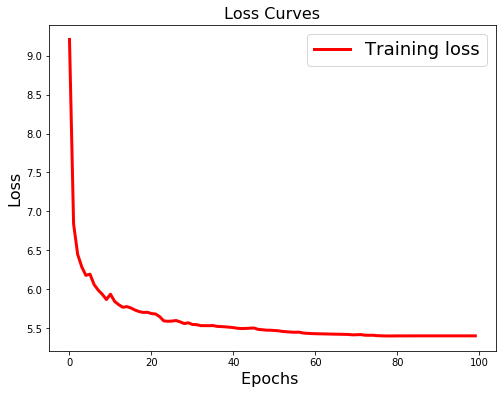

In [26]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model1 = RNNVanilla_1(vocabulary_size)
losses = model1.train_with_sgd( XTrain[:500], yTrain[:500],  break_points_list=[1,10,20,30,40,50,60,70,80,90],
                        eval_list =[XTrain[17]],learning_rate=0.01,nepoch=100, evaluate_loss_after=1)

## Halving the hidden layers

In [27]:
class RNNVanilla_2:
     
    def __init__(self, word_dim, hidden_dim=50, bptt_truncate=10):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))
        
        
    def softmax(self,x):
        xt = np.exp(x - np.max(x))
        return xt / np.sum(xt)
    
    def forward_propagation(self, x):
        # The total number of time steps
        T = len(x)

        # During forward propagation we save all hidden states in s because need them later.

        # We add one additional element for the initial hidden, which we set to 0
        s = np.zeros((T + 1, self.hidden_dim))
        s[-1] = np.zeros(self.hidden_dim)

        # The outputs at each time step. Again, we save them for later.
        o = np.zeros((T, self.word_dim))

        # For each time step...
        for t in np.arange(T):
            # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
            s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
            o[t] = self.softmax(self.V.dot(s[t]))
        return [o, s] 

    def predict(self, x):
        # Perform forward propagation and return index of the highest score
        o, s = self.forward_propagation(x)
        return np.argmax(o, axis=1)

    def calculate_total_loss(self, x, y):
        L = 0

        # For each sentence...
        for i in np.arange(len(y)):
            o, s = self.forward_propagation(x[i])

            # We only care about our prediction of the "correct" words
            correct_word_predictions = o[np.arange(len(y[i])), y[i]]

            # Add to the loss based on how off we were
            L += -1 * sum(np.log(correct_word_predictions))
        return L
 
    def calculate_loss(self, x, y):
        # Divide the total loss by the number of training examples
        N = sum((len(y_i) for y_i in y))
        return self.calculate_total_loss(x,y)/N
    def bptt(self, x, y):
        T = len(y)
        # Perform forward propagation
        o, s = self.forward_propagation(x)
        # We accumulate the gradients in these variables
        dLdU = np.zeros(self.U.shape)
        dLdV = np.zeros(self.V.shape)
        dLdW = np.zeros(self.W.shape)
        delta_o = o
        delta_o[np.arange(len(y)), y] -= 1.
        # For each output backwards...
        for t in np.arange(T)[::-1]:
            dLdV += np.outer(delta_o[t], s[t].T)

            # Initial delta calculation
            delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))

            # Backpropagation through time (for at most self.bptt_truncate steps)
            for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:

                # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
                dLdW += np.outer(delta_t, s[bptt_step-1])              
                dLdU[:,x[bptt_step]] += delta_t

                # Update delta for next step
                delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
        return [dLdU, dLdV, dLdW]
    
    def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
        # Calculate the gradients using backpropagation. We want to checker if these are correct.
        bptt_gradients = self.bptt(x, y)

        # List of all parameters we want to check.
        model_parameters = ['U', 'V', 'W']

        # Gradient check for each parameter
        for pidx, pname in enumerate(model_parameters):
            # Get the actual parameter value from the mode, e.g. model.W
            parameter = operator.attrgetter(pname)(self)
            print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
            # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
            it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
            while not it.finished:
                ix = it.multi_index
                # Save the original value so we can reset it later
                original_value = parameter[ix]
                # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
                parameter[ix] = original_value + h
                gradplus = self.calculate_total_loss([x],[y])
                parameter[ix] = original_value - h
                gradminus = self.calculate_total_loss([x],[y])
                estimated_gradient = (gradplus - gradminus)/(2*h)
                # Reset parameter to original value
                parameter[ix] = original_value
                # The gradient for this parameter calculated using backpropagation
                backprop_gradient = bptt_gradients[pidx][ix]
                # calculate The relative error: (|x - y|/(|x| + |y|))
                relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
                # If the error is to large fail the gradient check
                if relative_error > error_threshold:
                    print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                    print ("+h Loss: %f" % gradplus)
                    print ("-h Loss: %f" % gradminus)
                    print ("Estimated_gradient: %f" % estimated_gradient)
                    print ("Backpropagation gradient: %f" % backprop_gradient)
                    print ("Relative Error: %f" % relative_error)
                    return
                it.iternext()
            print ("Gradient check for parameter %s passed." % (pname))
            
            # Performs one step of SGD.
    def numpy_sdg_step(self, x, y, learning_rate):
        # Calculate the gradients
        dLdU, dLdV, dLdW = self.bptt(x, y)
        # Change parameters according to gradients and learning rate
        self.U -= learning_rate * dLdU
        self.V -= learning_rate * dLdV
        self.W -= learning_rate * dLdW
        
    def generate_sentence(self,model2,eval_list):
        flat_list = [item for sublist in eval_list for item in sublist]
    # We start the sentence with the start token
        new_sentence = [flat_list[0]]

        # Repeat until we get an end token
        while not new_sentence[-1] == word_to_index[sentence_end_token]:
            next_word_probs,_ = model2.forward_propagation(new_sentence)
            sampled_word = word_to_index[unknown_token]
            # We don't want to sample unknown words
            while sampled_word == word_to_index[unknown_token]:
                samples = np.random.multinomial(1, next_word_probs[-1])
                sampled_word = np.argmax(samples)
            new_sentence.append(sampled_word)
        sentence_str = [index_to_word[x] for x in new_sentence[1:-1]]
        return sentence_str


    def train_with_sgd(self, X_train, y_train, break_points_list,eval_list, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
        # We keep track of the losses so we can plot them later
        losses = []
        loss_per_epoch=[]
        num_examples_seen = 0
        for epoch in range(nepoch):
            # Optionally evaluate the loss
            if (epoch % evaluate_loss_after == 0):
                loss = model2.calculate_loss(X_train, y_train)
                losses.append((num_examples_seen, loss))
                loss_per_epoch.append(loss)
                time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
                # Adjust the learning rate if loss increases
                if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                    learning_rate = learning_rate * 0.5 
                    print ("Setting learning rate to %f" % learning_rate)
                sys.stdout.flush()
            if epoch in break_points_list:
                print("========================")
                print("Start Pred -- ")
                for eval_word in eval_list:
                    
                    print("Chunk of Input Words of a sentence-- ")
                    print(eval_word)
                    print('%s'%" ".join([index_to_word[x] for x in eval_word]))
                    
                    print("========================")
                    
                    prediction = model2.predict(eval_word)
                    #print(predictions.shape)#print("index_to_word>")
                    print("Output Words of the sentence at epoch--",epoch)
                    print(prediction)
                    print('%s'%" ".join([index_to_word[x] for x in prediction]))
                    
                    print("========================")
                
                num_sentences = 1
                senten_min_length = 7

                for i in range(num_sentences):
                    sent = []
                    # We want long sentences, not sentences with one or two words
                    while len(sent) < senten_min_length:
                        sent = self.generate_sentence(model2,eval_list)
                    print("Generate Words by feeding the first word to the model at epoch--",epoch)
                    print (" ".join(sent))
                
                print("========================")

            # For each training example...
            for i in range(len(y_train)):
                # One SGD step
                model2.numpy_sdg_step(X_train[i], y_train[i], learning_rate)
                num_examples_seen += 1
            #Plot the Loss Curves
        print(loss_per_epoch)
        plt.figure(figsize=[8,6])
        plt.plot(loss_per_epoch,'r',linewidth=3.0)
        plt.legend(['Training loss'],fontsize=18)
        plt.xlabel('Epochs ',fontsize=16)
        plt.ylabel('Loss',fontsize=16)
        plt.title('Loss Curves',fontsize=16)



## Gradient check after halving the hidden layers

In [28]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model2 = RNNVanilla_2(grad_check_vocab_size, 10, bptt_truncate=1000)
model2.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


/Users/pprusty05/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


## Random prediction after forward propagation

In [29]:
np.random.seed(10)
model2 = RNNVanilla_2(vocabulary_size)
o, s = model2.forward_propagation(XTrain[17])
print(o.shape)
#The following gives the indices of the highest probability predictions for each word:
predictions = model2.predict(XTrain[17])
print(XTrain[17])
print("input_words>")
print('%s'%" ".join([index_to_word[x] for x in XTrain[17]]))
print(predictions)
print("output_words>")
print('%s'%" ".join([index_to_word[x] for x in predictions]))

(28, 10000)
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
input_words>
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him
[7891 6861 1755 8789 8587 8961 8267 9524 6039 2923 6869 2453  376 4560
  845  333 8664 7061 9873 5915 6952 9495 1686 9160 7985 7082 9944 7595]
output_words>
streaming unanimous desperate hotter 10s conductor lilliput unbounded loadstones replaced crackled dread least indicates enthusiasm face sahara benches wages delta extensive dire origin scottish odin commonly latitudes specter


## Prediction at different epoch, Loss_Epoch plot after halving the hiddent units

2019-11-07 02:17:36: Loss after num_examples_seen=0 epoch=0: 9.210188
2019-11-07 02:17:52: Loss after num_examples_seen=500 epoch=1: 7.510408
2019-11-07 02:18:08: Loss after num_examples_seen=1000 epoch=2: 6.537028
2019-11-07 02:18:25: Loss after num_examples_seen=1500 epoch=3: 6.321965
2019-11-07 02:18:41: Loss after num_examples_seen=2000 epoch=4: 6.201744
2019-11-07 02:18:59: Loss after num_examples_seen=2500 epoch=5: 6.109289
2019-11-07 02:19:15: Loss after num_examples_seen=3000 epoch=6: 6.030009
2019-11-07 02:19:31: Loss after num_examples_seen=3500 epoch=7: 5.966508
2019-11-07 02:19:47: Loss after num_examples_seen=4000 epoch=8: 5.912170
2019-11-07 02:20:04: Loss after num_examples_seen=4500 epoch=9: 5.867711
2019-11-07 02:20:20: Loss after num_examples_seen=5000 epoch=10: 5.825028
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to be

2019-11-07 02:31:02: Loss after num_examples_seen=25500 epoch=51: 5.225257
2019-11-07 02:31:18: Loss after num_examples_seen=26000 epoch=52: 5.220941
2019-11-07 02:31:33: Loss after num_examples_seen=26500 epoch=53: 5.218914
2019-11-07 02:31:49: Loss after num_examples_seen=27000 epoch=54: 5.216644
2019-11-07 02:32:05: Loss after num_examples_seen=27500 epoch=55: 5.210882
2019-11-07 02:32:20: Loss after num_examples_seen=28000 epoch=56: 5.210272
2019-11-07 02:32:36: Loss after num_examples_seen=28500 epoch=57: 5.207797
2019-11-07 02:32:52: Loss after num_examples_seen=29000 epoch=58: 5.203537
2019-11-07 02:33:07: Loss after num_examples_seen=29500 epoch=59: 5.200402
2019-11-07 02:33:23: Loss after num_examples_seen=30000 epoch=60: 5.196178
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to bear with him means to obey and scarcely had his hea

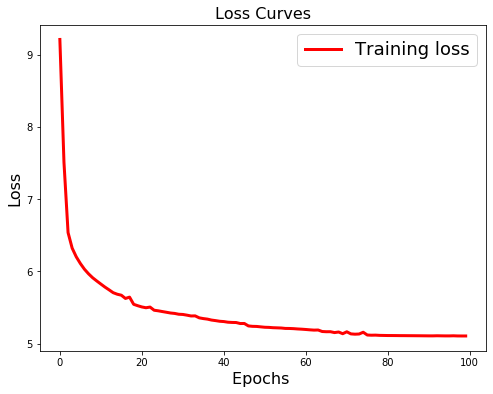

In [30]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model2 = RNNVanilla_2(vocabulary_size)
losses = model2.train_with_sgd( XTrain[:500], yTrain[:500],  break_points_list=[10,20,30,40,50,60,70,80,90],
                        eval_list =[XTrain[17]],learning_rate=0.01,nepoch=100, evaluate_loss_after=1)

# Observation

## By increasing the hidden layers

-the processing time increased. 

-loss plot did decrease faster.

-Word prediction improved.

## By reducing hidden layers

-the processing time decresed. 

-loss plot did not decrease faster or as lower as with higher hidden layers.

-Word prediction degraded. 

# Sentence length: Try doubling and halving your length of sentence that feeds into the network. And after training, plot the training loss vs the number of training epochs, and show the text sampling results. 


# Doubling the length of input sequence

## Prediction at different epoch, Loss_Epoch plot after doubling the length of input sequence

2019-11-07 02:43:53: Loss after num_examples_seen=0 epoch=0: 9.210207
2019-11-07 02:44:30: Loss after num_examples_seen=1000 epoch=1: 6.751138
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to attend upon him
Output Words of the sentence at epoch-- 1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the the the the the the the the the the the the the the the the the the the the the the the the the the the the
Generate Words by feeding the first word to the model at epoch-- 1
vernacular the practicing realization and them and on discovery and called by into masters a and build there when the turbines dilated all and rivals by water by the my utterly the fence as and seeland beginning strangely and the the to arne 

2019-11-07 03:09:05: Loss after num_examples_seen=42000 epoch=42: 5.108914
2019-11-07 03:09:40: Loss after num_examples_seen=43000 epoch=43: 5.103640
2019-11-07 03:10:16: Loss after num_examples_seen=44000 epoch=44: 5.099689
2019-11-07 03:10:51: Loss after num_examples_seen=45000 epoch=45: 5.093442
2019-11-07 03:11:27: Loss after num_examples_seen=46000 epoch=46: 5.091956
2019-11-07 03:12:02: Loss after num_examples_seen=47000 epoch=47: 5.089846
2019-11-07 03:12:38: Loss after num_examples_seen=48000 epoch=48: 5.084561
2019-11-07 03:13:14: Loss after num_examples_seen=49000 epoch=49: 5.080528
2019-11-07 03:13:49: Loss after num_examples_seen=50000 epoch=50: 5.076309
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to bear with him means to obey and scarcely had his heavy feet resounded within our joint domicile than he shouted for me to atten

2019-11-07 03:37:24: Loss after num_examples_seen=91000 epoch=91: 4.909629
2019-11-07 03:37:57: Loss after num_examples_seen=92000 epoch=92: 4.909553
2019-11-07 03:38:30: Loss after num_examples_seen=93000 epoch=93: 4.907635
2019-11-07 03:39:04: Loss after num_examples_seen=94000 epoch=94: 4.907105
2019-11-07 03:39:37: Loss after num_examples_seen=95000 epoch=95: 4.905130
2019-11-07 03:40:11: Loss after num_examples_seen=96000 epoch=96: 4.904062
2019-11-07 03:40:44: Loss after num_examples_seen=97000 epoch=97: 4.903375
2019-11-07 03:41:18: Loss after num_examples_seen=98000 epoch=98: 4.905497
Setting learning rate to 0.000039
2019-11-07 03:41:51: Loss after num_examples_seen=99000 epoch=99: 4.895853
[9.210207089253963, 6.75113847283557, 6.459982812433754, 6.30240474569123, 6.192293464133111, 6.107636950439203, 6.0340092832115895, 5.964789149408777, 5.900204645082089, 5.844400398100248, 5.797517979266372, 5.756817023487901, 5.729753737030185, 5.694755561657594, 5.66969481193652, 5.65944

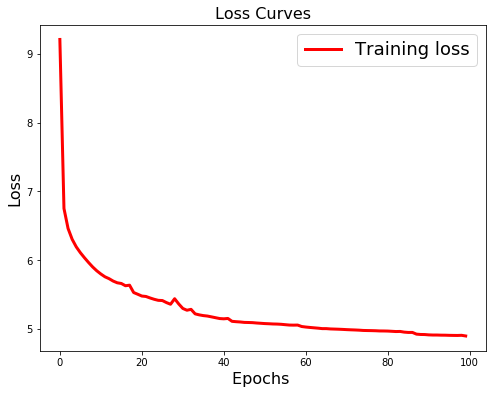

In [31]:
np.random.seed(10)
model2 = RNNVanilla_2(vocabulary_size)
losses = model2.train_with_sgd( XTrain[:1000], yTrain[:1000],  break_points_list=[1,10,20,30,40,50,60,70,80,90],
                        eval_list =[XTrain[17]],learning_rate=0.01,nepoch=100, evaluate_loss_after=1)

# Halving the length of input sequence

## Prediction at different epoch, Loss_Epoch plot after halving the input sequence

2019-11-07 03:42:23: Loss after num_examples_seen=0 epoch=0: 9.210223
2019-11-07 03:42:33: Loss after num_examples_seen=250 epoch=1: 9.194876
2019-11-07 03:42:43: Loss after num_examples_seen=500 epoch=2: 6.997596
2019-11-07 03:42:52: Loss after num_examples_seen=750 epoch=3: 6.574417
2019-11-07 03:43:02: Loss after num_examples_seen=1000 epoch=4: 6.386311
2019-11-07 03:43:12: Loss after num_examples_seen=1250 epoch=5: 6.270769
2019-11-07 03:43:22: Loss after num_examples_seen=1500 epoch=6: 6.192518
2019-11-07 03:43:32: Loss after num_examples_seen=1750 epoch=7: 6.131041
2019-11-07 03:43:42: Loss after num_examples_seen=2000 epoch=8: 6.077244
2019-11-07 03:43:52: Loss after num_examples_seen=2250 epoch=9: 6.027773
2019-11-07 03:44:02: Loss after num_examples_seen=2500 epoch=10: 5.982538
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to bear

2019-11-07 03:50:51: Loss after num_examples_seen=12750 epoch=51: 5.498854
2019-11-07 03:51:01: Loss after num_examples_seen=13000 epoch=52: 5.497716
2019-11-07 03:51:11: Loss after num_examples_seen=13250 epoch=53: 5.496718
2019-11-07 03:51:21: Loss after num_examples_seen=13500 epoch=54: 5.494991
2019-11-07 03:51:31: Loss after num_examples_seen=13750 epoch=55: 5.493463
2019-11-07 03:51:40: Loss after num_examples_seen=14000 epoch=56: 5.491648
2019-11-07 03:51:50: Loss after num_examples_seen=14250 epoch=57: 5.489586
2019-11-07 03:52:01: Loss after num_examples_seen=14500 epoch=58: 5.487112
2019-11-07 03:52:10: Loss after num_examples_seen=14750 epoch=59: 5.484523
2019-11-07 03:52:20: Loss after num_examples_seen=15000 epoch=60: 5.482771
Start Pred -- 
Chunk of Input Words of a sentence-- 
[1, 4, 1159, 19, 76, 216, 4, 3249, 5, 332, 20, 26, 488, 104, 3250, 226, 34, 7929, 7930, 75, 25, 2649, 27, 47, 4, 4913, 62, 76]
SENTENCE_START to bear with him means to obey and scarcely had his hea

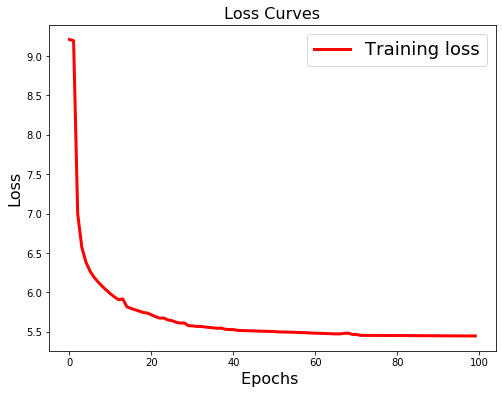

In [32]:
np.random.seed(10)
model2 = RNNVanilla_2(vocabulary_size)
losses = model2.train_with_sgd( XTrain[:250], yTrain[:250],  break_points_list=[10,20,30,40,50,60,70,80,90],
                        eval_list =[XTrain[17]],learning_rate=0.01,nepoch=100, evaluate_loss_after=1)

# Observation

## By increasing the training samples fed to the network

-the processing time increased. 

-Word prediction improved.

## By reducing hidden layers

-the processing time decresed. 

-Word prediction degraded. 